In [1]:
# 1. Imports
import pandas as pd
import re
import time
from collections import Counter
import matplotlib.pyplot as plt


In [5]:
# 2. Load dataset
df = pd.read_csv("Naukri_Data_Analyst_Jobs.csv")

df.head()



,Job Role,Company,Job Type,Location,Experience,Salary per annual,Description,Key Skills,Posted on,Apply link
0,Analyst - Data Services,RF Managed Services,work from office,Chennai,2-4 Yrs,up to 300000,GraduatesPost Graduates in any stream Skill Se...,Application support Automation Data conversion...,30+ Days Ago,https:www.naukri.comjob-listings-Analyst-Data-...
1,Analyst Programmer- RPA,CreditAccess Grameen,work from office,Chennai,2-6 Yrs,up to 300000,Proven ability to bridge technology and Busine...,Python Django power bi retail finance,7 Days Ago,https:www.naukri.comjob-listings-Analyst-progr...
2,Analytical Executive,GVK Emergency Management and Research Institut...,work from office,Chennai,4-7 Yrs,up to 300000,Experience working in a team setting and desir...,Excel Data Analysis SQL Server Data mining res...,1 Day Ago,https:www.naukri.comjob-listings-analytical-ex...
3,Analytics Consultant,Chryselys,work from office,Chennai,2-5 Yrs,up to 300000,5 years of relevant post-collegiate job experi...,IT Skills Data Science Cloud AWS Tableau Azure...,30+ Days Ago,https:www.naukri.comjob-listings-analytics-con...
4,Analytics Modeler - SAS Economics - Candidates...,Smartlyhr,work from office,Chennai,3-6 Yrs,up to 300000,Demand & Time Series forecasting modeling Sala...,Economic Research SAS,21 Days Ago,https:www.naukri.comjob-listings-analytics-mod...


In [6]:
# Basic Cleaning 
text_cols = [
    "Job Role", "Company", "Job Type", "Location", 
    "Experience", "Salary per annual", "Description", 
    "Key Skills", "Posted on", "Apply link"
]

for col in text_cols:
    df[col] = df[col].astype(str).str.strip()


In [7]:
# Clean Salary Column
def clean_salary(s):
    s = s.lower().replace("₹", "").replace(",", "")
    
    nums = re.findall(r'\d+', s)
    
    if len(nums) >= 1:
        return int(nums[0])
    return None

df["Cleaned_Salary"] = df["Salary per annual"].apply(clean_salary)


In [8]:
# Clean Experience Column
def clean_experience(s):
    nums = re.findall(r'\d+', s)
    if nums:
        return int(nums[0])
    return None

df["Experience_Years"] = df["Experience"].apply(clean_experience)


In [9]:
# Key Skills Extraction Using Regex + Counter
def extract_skills(skill_text):
    skills = re.split(r'[,/|•]', skill_text)
    skills = [s.strip().lower() for s in skills if s.strip()]
    return skills

df["Skill_List"] = df["Key Skills"].apply(extract_skills)

all_skills = [skill for row in df["Skill_List"] for skill in row]

skill_counts = Counter(all_skills)
skill_counts.most_common(10)


[('metadata data management test scripts talent acquisition process improvement pharma sas programming manager quality control',
  4),
 ('data analysis sql queries analytical pivots ms excel communication analytical skills excel',
  2),
 ('revenue cycle management us healthcare advanced ms excel data analyst microsoft office suite microsoft excel query communication',
  2),
 ('quantum data processing spss communication ascii excel mrdcl', 2),
 ('data analysis image processing renewable energy autocad analytical microstation remote sensing analytics',
  2),
 ('sap di docker ci cd python sap data intelligence nodejs qa data sources',
  2),
 ('it skills quality assurance cloud digital marketing data analysis change management manager quality assurance direct marketing',
  2),
 ('business system analyst warehouse translationproduct portfolio diversity and inclusion agile methodology information technology data warehousing',
  2),
 ('data analysis tableau data science diversity and inclusio

In [10]:
# Total Jobs
total_jobs = len(df)
total_jobs


409

In [11]:
# Top Job Locations
top_locations = df["Location"].value_counts().head(5)
top_locations


Location
Chennai                372
Coimbatore              21
Chennai, Coimbatore      9
Trichy                   2
Salem                    2
Name: count, dtype: int64

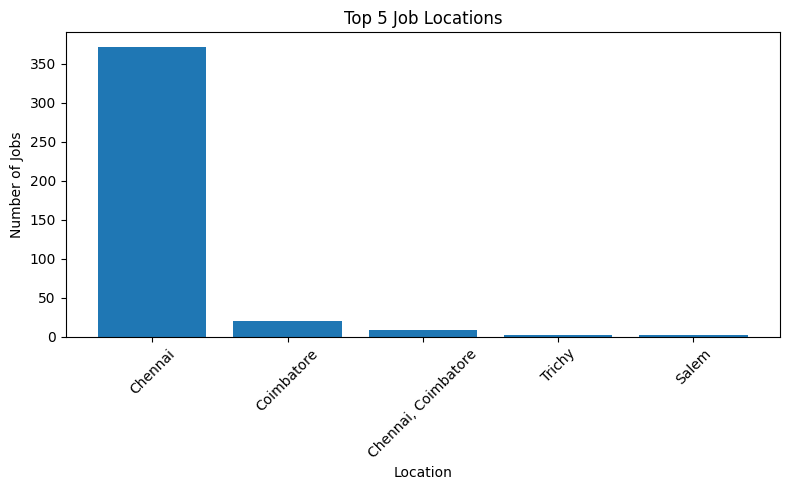

In [12]:
# Visualization — Top 5 Job Locations
plt.figure(figsize=(8,5))
plt.bar(top_locations.index, top_locations.values)
plt.title("Top 5 Job Locations")
plt.xlabel("Location")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
# Most In-Demand Skills (Top 10)
pd.DataFrame(skill_counts.most_common(10), columns=["Skill", "Count"])


,Skill,Count
0,metadata data management test scripts talent a...,4
1,data analysis sql queries analytical pivots ms...,2
2,revenue cycle management us healthcare advance...,2
3,quantum data processing spss communication asc...,2
4,data analysis image processing renewable energ...,2
5,sap di docker ci cd python sap data intelligen...,2
6,it skills quality assurance cloud digital mark...,2
7,business system analyst warehouse translationp...,2
8,data analysis tableau data science diversity a...,2
9,azure ml analytical jupyter azure verbal writt...,2
